# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



1. Clean the data and perform some EDA and visualization to get to know the data set.

In [58]:
import pandas as pd

In [59]:
df = pd.read_csv("airbnb_hw.csv")
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [60]:
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'], errors="coerce")

In [61]:
df.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [62]:
df.rename(columns={'Neighbourhood ': 'Neighbourhood'}, inplace=True)

['Apartment' 'House' 'Other' 'Bed & Breakfast' 'Loft' 'Condominium'
 'Townhouse' nan 'Dorm' 'Boat' 'Cabin' 'Villa' 'Bungalow' 'Camper/RV'
 'Treehouse' 'Tent' 'Hut' 'Lighthouse' 'Chalet' 'Castle'] 

Property Type
Apartment          27102
House               2090
Loft                 753
Bed & Breakfast      180
Townhouse            136
Condominium           94
Other                 47
Dorm                  31
Boat                   8
Villa                  8
Camper/RV              7
Bungalow               4
Treehouse              4
Tent                   4
Hut                    2
Cabin                  2
Lighthouse             1
Chalet                 1
Castle                 1
Name: count, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



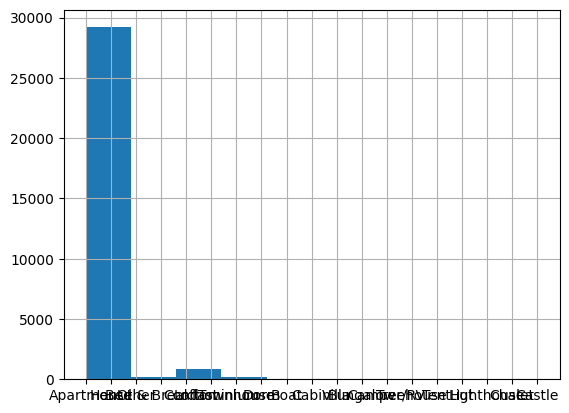

In [63]:
var = "Property Type"
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n') #
print(df[var].hist(), '\n') # About 72% of observations are male

In [64]:
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables; `object` is a bad sign
print(df.columns, '\n') # Column names

(30478, 13) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                           int64
Review Scores Rating          float64
dtype: object 

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object') 



In [65]:

objectsToConvert = ["Neighbourhood", "Room Type", "Property Type"]
df[objectsToConvert] = df[objectsToConvert].astype(str)

for column in objectsToConvert:
    df.loc[:, column] = df[column].astype(str)

df["Neighbourhood"] = df["Neighbourhood"].astype(str)


In [66]:
df = df[["Neighbourhood", "Room Type", "Property Type", 'Number Of Reviews', "Price"]]
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables; `object` is a bad sign
print(df.columns, '\n') # Column names

(30478, 5) 

Neighbourhood        object
Room Type            object
Property Type        object
Number Of Reviews     int64
Price                 int64
dtype: object 

Index(['Neighbourhood', 'Room Type', 'Property Type', 'Number Of Reviews',
       'Price'],
      dtype='object') 



In [67]:
df.loc[:,['Neighbourhood','Price']].groupby(['Neighbourhood']).describe()

Price                                                     \
                 count        mean         std   min    25%    50%    75%   
Neighbourhood                                                               
Bronx            345.0   94.660870  218.421021  10.0   50.0   69.0   99.0   
Brooklyn       11675.0  129.500471  155.387024  10.0   70.0  100.0  150.0   
Manhattan      16033.0  198.474584  221.814807  20.0  100.0  155.0  225.0   
Queens          2278.0  103.222125  119.559563  25.0   60.0   80.0  120.0   
Staten Island    147.0  163.462585  450.109002  35.0   59.0   79.0  109.0   

                        
                   max  
Neighbourhood           
Bronx           4000.0  
Brooklyn        8000.0  
Manhattan      10000.0  
Queens          4000.0  
Staten Island   5000.0

In [68]:
df.loc[:,['Property Type','Price']].groupby(['Property Type']).describe()

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               753.0  221.960159  271.958145   30.0   80.00  140.0   
Other               47.0  394.659574  696.663423   39.0   82.50  135.0   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          136.0  203.933824  264.178901   45.0   89.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                8.0  328.000000  479.888975   60.0  107.50  187.5   
nan                  3.0  145.000000   22.912878  120.0  135.00  150.0   

                                  
                    75%      max  
Property Type                     
Apartment        195.00  10000.0  
Bed & Breakfast  125.00    900.0  
Boat             178.50    250.0  
Bungalow         177.75    195.0  
Cabin            207.50    250.0  
Camper/RV        109.00    325.0  
Castle           150.00    150.0  
Chalet            99.00     99.0  
Condominium      298.75   1990.0  
Dorm              80.00    200.0  
House            150.00   8000.0  
Hut               87.50    100.0  
Lighthouse        39.00     39.0  
Loft             240.00   3000.0  
Other            378.00   4000.0  
Tent             175.00    250.0  
Townhouse        206.25   2500.0  
Treehouse        156.00    300.0  
Villa            224.75   1500.0  
nan              157.50    165.0

In [69]:
import seaborn as sns

<Axes: xlabel='Neighbourhood', ylabel='Count'>

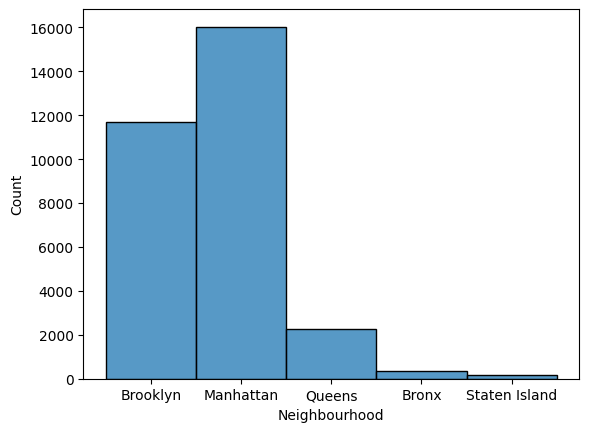

In [70]:
var = "Neighbourhood"
sns.histplot(df[var])

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [71]:
df_transformed = pd.get_dummies(df, dtype='int')
# pd.get_dummies(X['bird'],dtype='int')

In [72]:
df_transformed.head()

,Number Of Reviews,Price,Neighbourhood_Bronx,Neighbourhood_Brooklyn,Neighbourhood_Manhattan,Neighbourhood_Queens,Neighbourhood_Staten Island,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,...,Property Type_House,Property Type_Hut,Property Type_Lighthouse,Property Type_Loft,Property Type_Other,Property Type_Tent,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa,Property Type_nan
0,0,145,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,37,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,28,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,199,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,39,549,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


3. Implement an ~80/~20 train-test split. Put the test data aside.


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
nan_counts = df_transformed.isna().sum()
print(nan_counts)

Number Of Reviews                0
Price                            0
Neighbourhood_Bronx              0
Neighbourhood_Brooklyn           0
Neighbourhood_Manhattan          0
Neighbourhood_Queens             0
Neighbourhood_Staten Island      0
Room Type_Entire home/apt        0
Room Type_Private room           0
Room Type_Shared room            0
Property Type_Apartment          0
Property Type_Bed & Breakfast    0
Property Type_Boat               0
Property Type_Bungalow           0
Property Type_Cabin              0
Property Type_Camper/RV          0
Property Type_Castle             0
Property Type_Chalet             0
Property Type_Condominium        0
Property Type_Dorm               0
Property Type_House              0
Property Type_Hut                0
Property Type_Lighthouse         0
Property Type_Loft               0
Property Type_Other              0
Property Type_Tent               0
Property Type_Townhouse          0
Property Type_Treehouse          0
Property Type_Villa 

In [75]:
import numpy as np

In [76]:
y = df_transformed['Price']
X = df_transformed.drop('Price', axis=1)

np.random.seed(1000)

N = df.shape[0]
train_size = int(.8*N)

index = np.arange(N)
np.random.shuffle(index)

train_rows = index[:train_size]
test_rows = index[train_size:]

y = df['Price']
y_train = y.iloc[train_rows]
y_test = y.iloc[test_rows]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

In [77]:
X.head()

,Number Of Reviews,Neighbourhood_Bronx,Neighbourhood_Brooklyn,Neighbourhood_Manhattan,Neighbourhood_Queens,Neighbourhood_Staten Island,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Property Type_Apartment,...,Property Type_House,Property Type_Hut,Property Type_Lighthouse,Property Type_Loft,Property Type_Other,Property Type_Tent,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa,Property Type_nan
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,39,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {rmse_train}, R²: {r2_train}")
print(f"Test RMSE: {rmse_test}, R²: {r2_test}")


Train RMSE: 174.32411272880964, R²: 0.14697870140070846
Test RMSE: 217.0767172768177, R²: 0.11222513811952184


In [79]:
reg = LinearRegression().fit(X, y)
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print("R squared for X and y: ", reg.score(X, y)) # R squared measure

142.52978565425377
[  -0.44606539  -24.84298807   -7.01498932   51.74754595  -26.64852953
    6.75896097   87.4486517   -33.52807428  -53.92057742  -36.28087495
   -9.37051073  -48.49533511  -55.03493323  -11.6867979   -91.76477223
   -9.85712655   54.10964786   30.72408147  -38.83074948   19.17925343
  -36.29171561 -182.17918647   47.95529031  236.33923466    9.79567683
   11.97184529   37.88704156  160.49853875  -88.66860789]
R squared for X and y:  0.13787160952749533


5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [80]:
df_transformed.drop(columns=['Property Type_nan'])

,Number Of Reviews,Price,Neighbourhood_Bronx,Neighbourhood_Brooklyn,Neighbourhood_Manhattan,Neighbourhood_Queens,Neighbourhood_Staten Island,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,...,Property Type_Dorm,Property Type_House,Property Type_Hut,Property Type_Lighthouse,Property Type_Loft,Property Type_Other,Property Type_Tent,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa
0,0,145,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,37,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,28,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,199,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,39,549,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,0,300,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
30474,0,125,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
30475,0,80,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
30476,0,35,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df_transformed

,Number Of Reviews,Price,Neighbourhood_Bronx,Neighbourhood_Brooklyn,Neighbourhood_Manhattan,Neighbourhood_Queens,Neighbourhood_Staten Island,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,...,Property Type_House,Property Type_Hut,Property Type_Lighthouse,Property Type_Loft,Property Type_Other,Property Type_Tent,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa,Property Type_nan
0,0,145,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,37,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,28,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,199,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,39,549,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,0,300,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
30474,0,125,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
30475,0,80,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
30476,0,35,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming `df_transformed` is already defined with encoded and preprocessed features
X = df_transformed.drop(columns=["Price"])
y = df_transformed["Price"]

# Loop over different polynomial degrees
for i in range(1, 4):
    print(f"\nEvaluating model with Polynomial Degree: {i}")
    poly = PolynomialFeatures(degree=i, interaction_only=True,include_bias=False)
    X_poly = poly.fit_transform(X)
    X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

    # i am redoing the split to take in the trained data
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Model Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}")



Evaluating model with Polynomial Degree: 1
Model Evaluation:
Mean Absolute Error (MAE): 71.3996318872514
Mean Squared Error (MSE): 35989.415008581054
R² Score: 0.13932029832513082

Evaluating model with Polynomial Degree: 2


Model Evaluation:
Mean Absolute Error (MAE): 83297240570857.14
Mean Squared Error (MSE): 4.117789127982291e+31
R² Score: -9.847610797193534e+26

Evaluating model with Polynomial Degree: 3
Model Evaluation:
Mean Absolute Error (MAE): 10780218595751.725
Mean Squared Error (MSE): 2.5599147191736417e+29
R² Score: -6.121985134479529e+24


The more complex model performs much worse than the simpler one due to overfitting. The $R^2$ is negative, which is a sign of overfitting.